# Pre Analysis

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
#importing the data sets
retailer_data = pd.DataFrame(pd.read_csv('Retailer.csv'))
product_data = pd.DataFrame(pd.read_csv('Product.csv'))
sales_data1 = pd.DataFrame(pd.read_csv('File 01 - Sales Data.csv'))
sales_data2 = pd.DataFrame(pd.read_csv('File 02 - Sales Data.csv'))

In [3]:
#merge sales_data1 & sales_data2
df = [ sales_data1, sales_data2]
data = pd.DataFrame(pd.concat(df)).sort_values(by=['Date'], ascending=False)

### Sales Data

In [4]:
data.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
513320,WADU0118,WADDUWA - R1,501480,"Wednesday, September 26 2012",3,201.78,0,0.0
116823,DEMA0349,DEMATAGODA - R1,501467,"Wednesday, September 26 2012",2,340.62,0,0.0
116945,DEMA0349,DEMATAGODA - R1,501765,"Wednesday, September 26 2012",3,594.06,0,0.0
360346,KADU0308,KADUWELA - R1,501480,"Wednesday, September 26 2012",6,403.56,0,0.0
142539,HANW0168,HANWELLA - R1,500137,"Wednesday, September 26 2012",1,108.01,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137470 entries, 513320 to 119053
Data columns (total 8 columns):
Retailer Code         1137470 non-null object
Rep                   1137470 non-null object
Product Code          1137470 non-null int64
Date                  1137470 non-null object
Net Sales Qty         1137470 non-null int64
Net Sales Value       1137470 non-null float64
Sales Return Qty      1137470 non-null int64
Sales Return Value    1137470 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 78.1+ MB


### Retailer Data

In [6]:
retailer_data.head()

,Retailer Code,Sub Ret Cat Name,Zone Name,Region Name,Territory Name
0,ATHU0001,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
1,ATHU0003,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
2,ATHU0005,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
3,ATHU0006,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
4,ATHU0007,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA


In [7]:
retailer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 5 columns):
Retailer Code       6110 non-null object
Sub Ret Cat Name    5872 non-null object
Zone Name           6110 non-null object
Region Name         6110 non-null object
Territory Name      6118 non-null object
dtypes: object(5)
memory usage: 239.1+ KB


### Product Data

In [8]:
product_data.head()

,Product Code,Product Description,Product Group Name,Brand Name,Sub Product Description
0,500003,BIEN AIME COLOGNE 50ML,Cologne,Bien Aime,REGULAR COLOGNE
1,500004,BIEN AIME COLOGNE 100ML,Cologne,Bien Aime,REGULAR COLOGNE
2,500031,BABY CHERAMY SHAMPOO 125ML old,SHAMPOO,Baby Cheramy,REGULAR SHAMPOO
3,500034,BIEN AIME COLOGNE 200ML,Cologne,Bien Aime,REGULAR COLOGNE
4,500047,BABY CHERAMY PRICKLY HEAT 100G,Talc & Powder,Baby Cheramy,PRICKLY HEAT TALC


In [9]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
Product Code               457 non-null int64
Product Description        457 non-null object
Product Group Name         457 non-null object
Brand Name                 457 non-null object
Sub Product Description    457 non-null object
dtypes: int64(1), object(4)
memory usage: 17.9+ KB


In [10]:
retailer_data['Retailer Code'].nunique()

6110

In [11]:
data['Retailer Code'].nunique()

7139

In [12]:
clean = retailer_data.dropna()

In [13]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6117
Data columns (total 5 columns):
Retailer Code       5872 non-null object
Sub Ret Cat Name    5872 non-null object
Zone Name           5872 non-null object
Region Name         5872 non-null object
Territory Name      5872 non-null object
dtypes: object(5)
memory usage: 275.2+ KB


In [14]:
retailers = clean['Retailer Code'].unique()

In [64]:
data = data[data['Retailer Code'].isin(retailers)]

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
Retailer Code         0 non-null object
Rep                   0 non-null object
Product Code          0 non-null int64
Date                  0 non-null datetime64[ns]
Net Sales Qty         0 non-null int64
Net Sales Value       0 non-null float64
Sales Return Qty      0 non-null int64
Sales Return Value    0 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 0.0+ bytes


In [17]:
product_data['Product Code'].nunique()

457

In [18]:
products = product_data['Product Code'].unique()

In [19]:
data = data[data['Product Code'].isin(products)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965231 entries, 116823 to 119053
Data columns (total 8 columns):
Retailer Code         965231 non-null object
Rep                   965231 non-null object
Product Code          965231 non-null int64
Date                  965231 non-null object
Net Sales Qty         965231 non-null int64
Net Sales Value       965231 non-null float64
Sales Return Qty      965231 non-null int64
Sales Return Value    965231 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 66.3+ MB


In [20]:
data.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
116823,DEMA0349,DEMATAGODA - R1,501467,"Wednesday, September 26 2012",2,340.62,0,0.0
116945,DEMA0349,DEMATAGODA - R1,501765,"Wednesday, September 26 2012",3,594.06,0,0.0
360346,KADU0308,KADUWELA - R1,501480,"Wednesday, September 26 2012",6,403.56,0,0.0
142539,HANW0168,HANWELLA - R1,500137,"Wednesday, September 26 2012",1,108.01,0,0.0
116895,DEMA0349,DEMATAGODA - R1,501487,"Wednesday, September 26 2012",12,533.28,0,0.0


In [59]:
prod_year = data.groupby('Product Code')['Date'].count().sort_values().reset_index()
#retailer_prod =  data.groupby(['Retailer Code', 'Product Code'])['Date'].count().sort_values().reset_incdex()
prod_year.head()

,Product Code,Date
0,605048,1
1,501578,1
2,605047,1
3,502074,1
4,501645,2


In [22]:
prod_year.tail()

,Product Code,Date
450,501461,29372
451,604927,30501
452,501453,33606
453,500137,44667
454,501459,51220


In [23]:
#convert to date time
data['Date'] = pd.to_datetime(data['Date'])

In [24]:
test_product = data[data['Product Code'].isin(['501459'])].reindex()
test_product.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
116768,DEMA0349,DEMATAGODA - R1,501459,2012-09-26,150,5293.50,0,0.0
359880,KADU0303,KADUWELA - R1,501459,2012-09-26,0,0.00,0,0.0
361277,KADU0322,KADUWELA - R1,501459,2012-09-26,15,529.35,0,0.0
117396,DEMA0352,DEMATAGODA - R1,501459,2012-09-26,150,5293.50,0,0.0
230598,KESB0302,KESBEWA - R1,501459,2012-09-26,1500,52935.00,0,0.0


# Model

### test for one product

In [25]:
sample_set = test_product.filter(['Date', 'Net Sales Qty'], axis=1).set_index('Date')
sample_set = sample_set.groupby('Date')['Net Sales Qty'].sum().reindex()
data_set = pd.DataFrame(sample_set)

In [26]:
 data_set.index = pd.to_datetime(data_set.index)

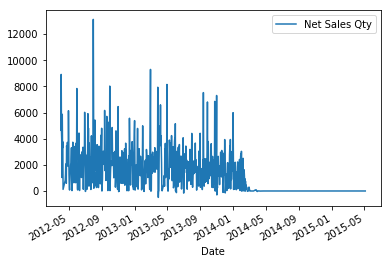

In [27]:
data_set.plot()

In [28]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 2012-04-02 to 2015-05-05
Data columns (total 1 columns):
Net Sales Qty    706 non-null int64
dtypes: int64(1)
memory usage: 11.0 KB


In [29]:
train_set = data_set.head(int(len(data_set)*0.70))
test_set = data_set.tail(int(len(data_set)*0.30))

In [30]:
#scale data
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
train_scaled = scaler.fit_transform(train_set)

In [33]:
test_scaled = scaler.transform(test_set)

In [34]:
def next_batch(training_data, batch_size, steps):
    rand_start = np.random.randint(0, len(training_data)-steps)
    y_batch = np.array(training_data[rand_start: rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)

In [35]:
#set up the RNN model
import tensorflow as tf

In [36]:
num_inputs = 1

num_time_steps = 12

num_neurons = 100

num_outputs = 1

learning_rate = 0.001

num_train_iterations = 6000

batch_size = 1

In [37]:
x = tf.placeholder(tf.float32,[None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32,[None, num_time_steps, num_outputs])

In [38]:
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units = num_neurons, activation = tf.nn.relu),  output_size = num_outputs)

In [39]:
outputs, states = tf.nn.dynamic_rnn(cell, x, dtype = tf.float32)

In [40]:
#loss function and optimizer
loss = tf.reduce_mean(tf.square(outputs-y))

In [41]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss)

In [42]:
#initialize global variables
init = tf.global_variables_initializer()

In [43]:
#create an save file
saver = tf.train.Saver()

In [44]:
#Session
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_train_iterations):
        x_batch, y_batch = next_batch(train_scaled, batch_size, num_time_steps)
        sess.run(train, feed_dict = { x: x_batch, y: y_batch})
        if iteration %100 == 0:
            mse = loss.eval(feed_dict = { x: x_batch, y: y_batch})
            print(iteration, '\tMSE: ', mse)
            
    saver.save(sess, './ex_time_series_model')

0 	MSE:  0.032626092
100 	MSE:  0.0037331078
200 	MSE:  0.024555653
300 	MSE:  0.015312397
400 	MSE:  0.0073461444
500 	MSE:  0.011969625
600 	MSE:  0.014264512
700 	MSE:  0.016802842
800 	MSE:  0.008027275
900 	MSE:  0.007065999
1000 	MSE:  0.009844562
1100 	MSE:  0.013759546
1200 	MSE:  0.009391434
1300 	MSE:  0.0135224955
1400 	MSE:  0.0076528317
1500 	MSE:  0.015115168
1600 	MSE:  0.0061913375
1700 	MSE:  0.01896774
1800 	MSE:  0.005746603
1900 	MSE:  0.0096385665
2000 	MSE:  0.024546213
2100 	MSE:  0.0060762297
2200 	MSE:  0.010867824
2300 	MSE:  0.0055120364
2400 	MSE:  0.0036498017
2500 	MSE:  0.020922905
2600 	MSE:  0.003480741
2700 	MSE:  0.023955716
2800 	MSE:  0.028729474
2900 	MSE:  0.008420554
3000 	MSE:  0.0065186545
3100 	MSE:  0.005313517
3200 	MSE:  0.022549467
3300 	MSE:  0.014395689
3400 	MSE:  0.0022671747
3500 	MSE:  0.00947532
3600 	MSE:  0.0033187103
3700 	MSE:  0.029322552
3800 	MSE:  0.005484707
3900 	MSE:  0.022588344
4000 	MSE:  0.020388378
4100 	MSE:  0.0088

In [78]:
#predict the future
test_set.head()

,Net Sales Qty,Generated
Date,,
2015-04-06,0,0.0
2015-04-27,0,0.0
2015-04-28,0,0.0
2015-04-29,0,0.0
2015-05-05,0,0.0


In [80]:
with tf.Session() as sess:
    saver.restore(sess, './ex_time_series_model')
    train_seed = list(train_scaled)
    n = int(len(test_scaled))
            
    for iteration in range(n):
        x_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict = {x: x_batch})
        
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [72]:
train_seed

[array([0.12110092]),
 array([0.08506422]),
 array([0.18165138]),
 array([0.21592661]),
 array([0.08946789]),
 array([0.2027156]),
 array([0.15655046]),
 array([0.16242202]),
 array([0.2626789]),
 array([0.53607339]),
 array([0.18297248]),
 array([0.07757798]),
 array([0.31390826]),
 array([0.10385321]),
 array([0.13511927]),
 array([0.19706422]),
 array([0.15434862]),
 array([0.1213945]),
 array([0.19794495]),
 array([0.17834862]),
 array([0.21673394]),
 array([0.30165138]),
 array([0.19757798]),
 array([0.05761468]),
 array([0.09680734]),
 array([0.19933945]),
 array([0.23045872]),
 array([0.15765138]),
 array([0.05497248]),
 array([0.20330275]),
 array([0.07515596]),
 array([0.16205505]),
 array([0.21262385]),
 array([0.11053211]),
 array([0.53944954]),
 array([0.04234862]),
 array([0.03530275]),
 array([0.04411009]),
 array([0.16653211]),
 array([0.17122936]),
 array([0.27075229]),
 array([0.57255046]),
 array([0.01401835]),
 array([0.08763303]),
 array([0.0533578]),
 array([0.1593

In [68]:
n = int(len(test_scaled))
results = scaler.inverse_transform(np.array(test_scaled).reshape(n,1))

In [69]:

test_set['Generated'] = results

C:\Users\Kumara Fernando\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
test_set.head()

,Net Sales Qty,Generated
Date,,
2013-09-18,1157,1157.0
2013-09-19,666,666.0
2013-09-20,1982,1982.0
2013-09-21,2449,2449.0
2013-09-22,726,726.0


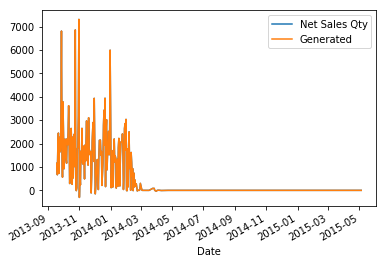

In [52]:
test_set.plot()